This is the model implemented by Cao and Choe, which contains code from their ipynb notebook. Training using their original 6-layer CNN is attempted.

In [6]:
import keras
import h5py
import PIL.Image
import os, shutil
from keras.models import load_model
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
from keras.regularizers import l2
import tensorflow as tf

In [4]:
train_ds = tf.data.Dataset.load('xBD_Dataset/xBD_train')
test_ds = tf.data.Dataset.load('xBD_Dataset/xBD_test')
val_ds = tf.data.Dataset.load('xBD_Dataset/xBD_val')

NameError: name 'tfds' is not defined

In [14]:
model = models.Sequential()
model.add(layers.Rescaling(1./255, input_shape = (100,100,3)))
model.add(layers.Conv2D(32,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 21, 21, 128)      

In [16]:
#compile the model with RMSprob with learning rate
from keras import optimizers
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(learning_rate=1e-4), metrics = ['acc'])

In [17]:
#fit the model from image generator
history = model.fit(
            train_ds,
            epochs=50,
            validation_data=val_ds)

Epoch 1/50
701/701 [==============================] - 8s 10ms/step - loss: 0.3329 - acc: 0.8566 - val_loss: 0.2688 - val_acc: 0.8947
Epoch 2/50
701/701 [==============================] - 7s 9ms/step - loss: 0.2084 - acc: 0.9201 - val_loss: 0.2456 - val_acc: 0.9004
Epoch 3/50
701/701 [==============================] - 7s 9ms/step - loss: 0.1799 - acc: 0.9331 - val_loss: 0.2213 - val_acc: 0.9132
Epoch 4/50
701/701 [==============================] - 6s 9ms/step - loss: 0.1632 - acc: 0.9397 - val_loss: 0.2077 - val_acc: 0.9200
Epoch 5/50
701/701 [==============================] - 7s 9ms/step - loss: 0.1521 - acc: 0.9443 - val_loss: 0.2003 - val_acc: 0.9254
Epoch 6/50
701/701 [==============================] - 7s 9ms/step - loss: 0.1438 - acc: 0.9470 - val_loss: 0.1907 - val_acc: 0.9282
Epoch 7/50
701/701 [==============================] - 7s 9ms/step - loss: 0.1366 - acc: 0.9496 - val_loss: 0.1766 - val_acc: 0.9354
Epoch 8/50
701/701 [==============================] - 6s 9ms/step - loss: 0

In [13]:
#it is generally a good practice to save the model after training
model.save('cc_model_1.h5')

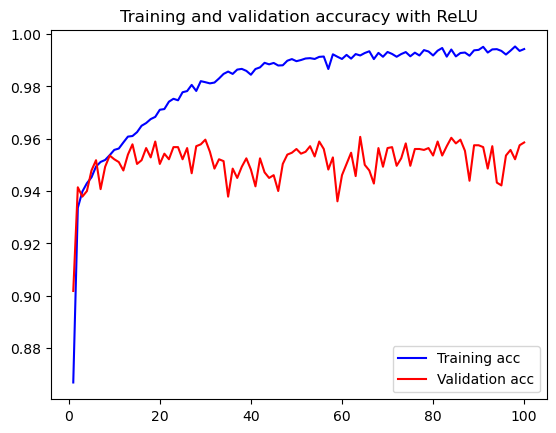

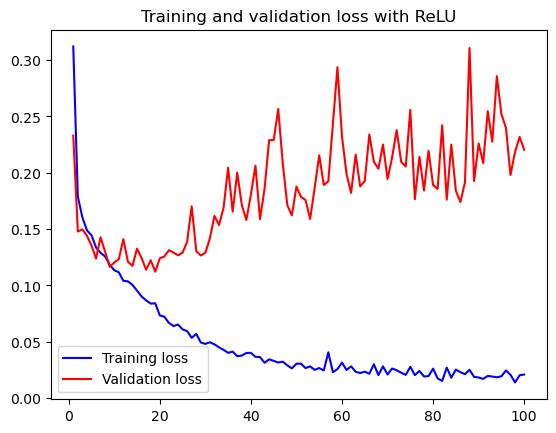

In [27]:
#plot loss and accuracy for detection overfitting (30 epochs)
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'b', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with ReLU')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with ReLU')
plt.legend()

plt.show()

In [20]:
# #the accuracy stalls at about 95.5% and we start seeing overfitting
# #we perform data augmentation
# #to fight overfitting, we add a Dropout layer right before 
# #the densely connected layer
# from keras import models
# from keras import layers
# from keras import optimizers
# model = models.Sequential()
# model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Flatten())
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(512,activation = 'relu'))
# model.add(layers.Dense(1, activation = 'sigmoid'))

# model.compile(loss = 'binary_crossentropy',
#                 optimizer = optimizers.RMSprop(lr = 1e-4),
#                  metrics = ['acc'])

In [21]:
# #train using data augmentation and dropout
# train_datagen = ImageDataGenerator(
#                     rescale = 1./255,
#                     rotation_range = 40,
#                     width_shift_range = 0.2,
#                     height_shift_range = 0.2,
#                     shear_range = 0.2,
#                     zoom_range = 0.2,
#                     horizontal_flip = True)
# test_datagen = ImageDataGenerator(rescale = 1./255) #validation data should not be augmented
# train_generator = train_datagen.flow_from_directory(
#                     '/home/ubuntu/train', 
#                     target_size = (150,150),
#                     batch_size = 32,
#                     class_mode = 'binary')
# validation_generator = test_datagen.flow_from_directory(
#                     '/home/ubuntu/validation', 
#                     target_size = (150,150),
#                     batch_size = 32,
#                     class_mode = 'binary')
# #train the model with fit_generator
# history = model.fit_generator(
#             train_generator,
#             steps_per_epoch = 100,
#             epochs = 100,
#             validation_data = validation_generator,
#             validation_steps = 50)

In [25]:
# #it is generally a good practice to save the model after training
# model.save('tomnod_2_100epochs.h5')

In [22]:
# #plot loss and accuracy for detection overfitting
# import matplotlib.pyplot as plt
# acc = history.history['acc']
# val_acc = history.history['val_acc']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(1,len(acc)+1)
# plt.plot(epochs, acc, 'bo', label = 'Training acc')
# plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
# plt.title('Training and validation accuracy with data aug and dropout')
# plt.legend()

# plt.figure()
# plt.plot(epochs, loss, 'bo', label = 'Training loss')
# plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
# plt.title('Training and validation loss with data aug and dropout')
# plt.legend()

# plt.show()

In [ ]:
#validation accuracy can go up to 97.44%

In [6]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomTranslation(0.2,0.2),
])

#try again with Adam optimizer
model = models.Sequential()
model.add(layers.Rescaling(1./255, input_shape = (100,100,3)))
model.add(data_augmentation)
model.add(layers.Conv2D(32,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
                optimizer = optimizers.Adam(),
                 metrics = ['acc'])

#fit the model from image generator
history = model.fit(
            train_ds,
            epochs=100,
            validation_data=val_ds)

701/701 [==============================] - 6s 9ms/step - loss: 0.3365 - acc: 0.8479 - val_loss: 0.2023 - val_acc: 0.9229


In [24]:
model.save('cc_model_with_dropout_1.h5')

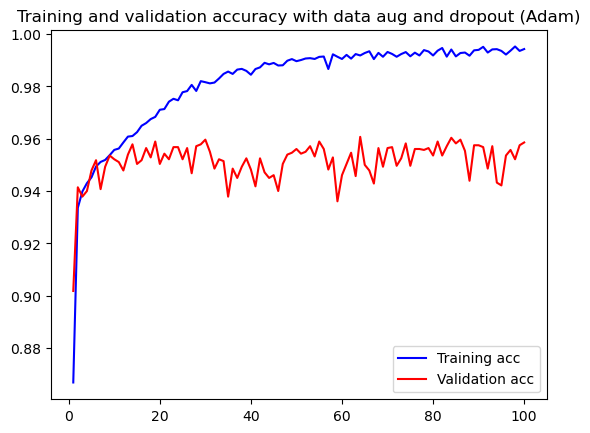

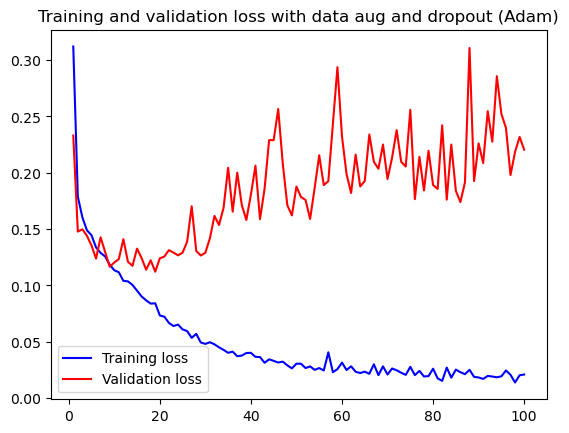

In [28]:
#plot loss and accuracy for detection overfitting
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'b', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with data aug and dropout (Adam)')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with data aug and dropout (Adam)')
plt.legend()

plt.show()